In [136]:
import pandas as pd
import numpy as np

In [137]:
import sqlite3
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [138]:
cur.execute('''SELECT * 
               FROM Product
               JOIN OrderDetail
               ON Product.ID = OrderDetail.ProductID;''')
ProductandOrders = pd.DataFrame(cur.fetchall())
ProductandOrders.columns = [x[0] for x in cur.description]

In [139]:
ProductandOrders.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,11,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0,10248/11,10248,11,14.0,12,0.0
1,42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00,26,0,0,1,10248/42,10248,42,9.8,10,0.0
2,72,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80,14,0,0,0,10248/72,10248,72,34.8,5,0.0
3,14,Tofu,6,7,40 - 100 g pkgs.,23.25,35,0,0,0,10249/14,10249,14,18.6,9,0.0
4,51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00,20,0,10,0,10249/51,10249,51,42.4,40,0.0


In [140]:
ProductandOrders.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,40.793039,14.488167,4.135499,27.948687,39.795824,8.074246,11.900232,0.105800,10659.375870,40.793039,26.218520,23.812993,0.056167
std,22.159019,8.228640,2.378567,31.610706,36.055668,19.748983,10.791421,0.307653,241.378032,22.159019,29.827418,19.022047,0.083450
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,22.000000,7.000000,2.000000,12.500000,17.000000,0.000000,0.000000,0.000000,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,41.000000,14.000000,4.000000,19.450000,25.000000,0.000000,10.000000,0.000000,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,60.000000,21.000000,6.000000,34.000000,57.000000,0.000000,20.000000,0.000000,10862.500000,60.000000,32.000000,30.000000,0.100000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000,11077.000000,77.000000,263.500000,130.000000,0.250000


In [141]:
cur.execute('''SELECT * 
               FROM OrderDetail;''')
Order = pd.DataFrame(cur.fetchall())
Order.columns = [x[0] for x in cur.description]

In [142]:
Order.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [143]:
Order.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [144]:
Order.Discount.unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [145]:
discount = Order[Order.Discount > 0]['Quantity']
no_discount = Order[Order.Discount == 0]['Quantity']

In [146]:
no_discount.mean()

21.715261958997722

In [147]:
## Import the packages
import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt


# No discount mean (μ1)
mu_nodiscount = no_discount.mean()

# Disount mean (x̄) using NumPy mean()
mu_discount = discount.mean()

# Sample Stadrad Deviation (sigma) using Numpy
std_discount = np.std(discount,ddof=1)

# Sample size (n)
n = len(discount)

# Degrees of Freedom
df = n-1

# Difference in means
diff = mu_discount - mu_nodiscount


# Print the findings
print ('The no discount group contains', n, 'observations, having a mean of', np.round(mu_discount,3), "and a standard deviation (sigma) = ", np.round(std_discount,3), 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', np.round(diff,3))

The no discount group contains 838 observations, having a mean of 27.11 and a standard deviation (sigma) =  20.771 , with 837 degrees of freedom. The difference between sample and population means is: 5.395


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


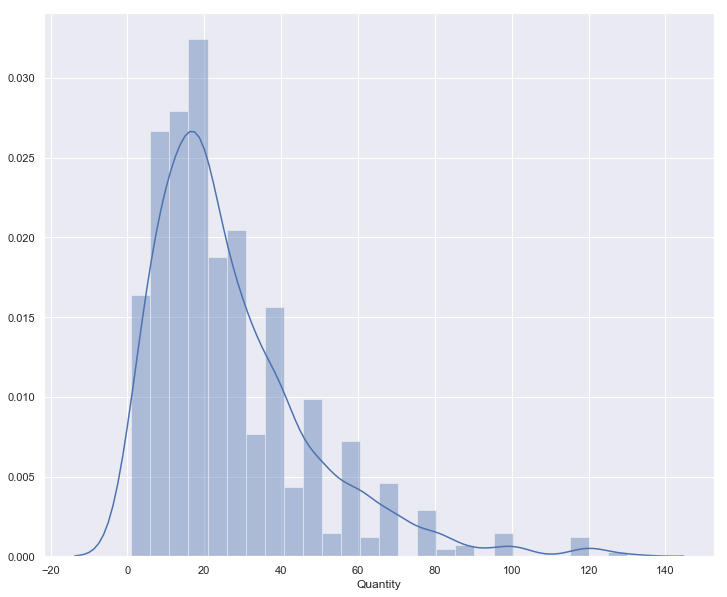

In [148]:
#How does the distribution of the discount variable look?

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(discount)

### **One Tail Hypothese Test - Does Discount Matter?**

#### Step 1: Write the null and alternative hypothesis statements

$H_{0}$ : There is no relationship between quantity and discount, i.e. mean number sold with a discount <= mean sold without a discount. 

$\mu_1 <= \mu_2$  --->  mu_discount <= 21.72

$H_{1}$ : There is a relationship between quanity and discount, i.e. mean number sold with a discount > mean sold without a discount. 

$\mu_1 > \mu_2$ ---> mu_discount > 21.72

#### Step 2: Choose a significance level (`α`)

`α` is the probability of rejecting the nully hypothesis when it is true. I will use the standard significance level of `α` = 0.05, meaning that there is a 5% chance risk of concluding that a difference exists when there is no actual difference.

#### Step 3: Calculate the t-statistic

The sample looks like a nicely shaped normal distribution. After fulfilling the three requirements for a t-test mentioned above i.e. normality, independence, and randomness, we are ready to calculate our t statistic using the formula for one-sample t-test given as:

 $$t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
 
> Using the formula given above, calculate the t-value in Python:

**`scipy.stats.t.ppf(1-alpha, df)`**

**`scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')`**

In [149]:
# Calculate critical t value
t_crit = np.round(stats.t.ppf(1 - 0.05, df=df),3)
t_crit

1.647

In [150]:
results = stats.ttest_1samp(a= discount, popmean= mu_nodiscount)         
print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))

The t-value for sample is 7.52 and the p-value is 0.0


In [151]:
if (results[0]>t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4),". I conclude with 95% confidence that there is a relationship between discount and quantity sold. Large quantities are sold when a discount is offered.")
else:
    print ("Null hypothesis is Accepted")

Null hypothesis rejected. Results are statistically significant with t-value = 7.52 and p-value = 0.0 . I conclude with 95% confidence that there is a relationship between discount and quantity sold. Large quantities are sold when a discount is offered.


In [152]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [155]:
OrderANOVA = Order.iloc[:,4:6]
OrderANOVA.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


In [156]:
OrderANOVA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
Quantity    2155 non-null int64
Discount    2155 non-null float64
dtypes: float64(1), int64(1)
memory usage: 33.8 KB


In [159]:
OrderANOVA.Discount = OrderANOVA.Discount.astype('str') #convert Discount to categorical so I can make dummies for ANOVA

In [160]:
pd.get_dummies(OrderANOVA)

,Quantity,Discount_0.0,Discount_0.01,Discount_0.02,Discount_0.03,Discount_0.04,Discount_0.05,Discount_0.06,Discount_0.1,Discount_0.15,Discount_0.2,Discount_0.25
0,12,1,0,0,0,0,0,0,0,0,0,0
1,10,1,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,0,0
3,9,1,0,0,0,0,0,0,0,0,0,0
4,40,1,0,0,0,0,0,0,0,0,0,0
5,10,1,0,0,0,0,0,0,0,0,0,0
6,35,0,0,0,0,0,0,0,0,1,0,0
7,15,0,0,0,0,0,0,0,0,1,0,0
8,6,0,0,0,0,0,1,0,0,0,0,0
9,15,0,0,0,0,0,1,0,0,0,0,0


In [164]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Quantity ~ C(Discount_0.01) + C(Discount_0.02) + C(Discount_0.03) + C(Discount_0.04) + C(Discount_0.5) + C(Discount_0.06) + C(Discount_0.1) + C(Discount_0.15) + C(Discount_0.2) + C(Discount_0.25)'
lm = ols(formula, OrderANOVA).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
#Creating Variables for levels of discounts

In [33]:
discount1 = Order[Order.Discount == 0.01]['Quantity']

In [34]:
discount1

2152    2
Name: Quantity, dtype: int64

In [37]:
discount2 = Order[Order.Discount == 0.02]['Quantity']
discount2

2133    1
2146    3
Name: Quantity, dtype: int64

In [38]:
discount3 = Order[Order.Discount == 0.03]['Quantity']
discount3

2139    1
2140    2
2150    2
Name: Quantity, dtype: int64

In [43]:
discount4 = Order[Order.Discount == 0.04]['Quantity']
discount4

2141    1
Name: Quantity, dtype: int64

In [44]:
discount5 = Order[Order.Discount == 0.05]['Quantity']
discount5

8         6
9        15
11       40
12       25
51       12
57       60
58       20
65       24
66       15
68       60
69       33
72       12
73        6
216      10
217       8
218      20
219      12
244      70
246      20
247      12
248      40
256       4
274      20
276      77
277      10
292      10
293      10
294      20
295      56
296      70
       ... 
1691    120
1712     20
1715     20
1716     14
1822     15
1823      6
1824     50
1825     16
1827     50
1828     50
1846      6
1926     18
1937     20
1938     15
1939     21
1963     70
1964     90
1971     40
1973     50
1974     36
1975     60
2057     20
2058     15
2059     18
2115     15
2116     10
2123     14
2134      1
2137      2
2144      2
Name: Quantity, Length: 185, dtype: int64

In [45]:
discount_5orless = Order[Order.Discount <= 0.05]['Quantity']
discount_5orless

0        12
1        10
2         5
3         9
4        40
5        10
8         6
9        15
10       20
11       40
12       25
13       40
14       20
15       42
16       40
19       21
20       20
21       35
22       25
23       30
24       15
25       12
26       25
27        6
28       15
32       10
33        1
35       50
38       20
39       20
       ... 
2116     10
2117      8
2118     40
2119     22
2120    130
2121     10
2122     20
2123     14
2131      4
2132      1
2133      1
2134      1
2136      1
2137      2
2138      4
2139      1
2140      2
2141      1
2142      2
2143      1
2144      2
2145      3
2146      3
2147      2
2148      2
2150      2
2151      1
2152      2
2153      4
2154      2
Name: Quantity, Length: 1509, dtype: int64

In [49]:
discount6 = Order[Order.Discount == 0.06]['Quantity']
discount6

2149    2
Name: Quantity, dtype: int64

In [50]:
discount10 = Order[Order.Discount == 0.1]['Quantity']
discount10

107     10
108      3
115     20
116     24
117      2
147     40
148     30
149     15
153     25
154     25
155     30
177     40
178     30
179     25
227     10
228     40
235     18
263     36
272     15
273     18
303     54
304     55
320      5
321     13
323     35
344      8
345     16
346     20
347     18
348     20
        ..
1547    30
1548    15
1561    70
1562    25
1563    42
1564    60
1628    42
1646    21
1753    20
1754    30
1776    30
1777    14
1779    20
1901    36
1902     8
1903    35
1912    40
1980    28
2007    10
2008    20
2029    70
2030    36
2031    15
2065    50
2094    40
2095    30
2096    77
2098    25
2099     4
2135     2
Name: Quantity, Length: 173, dtype: int64

In [51]:
discount15 = Order[Order.Discount == 0.15]['Quantity']
discount15

6       35
7       15
17      15
18      21
48      25
53      70
54      15
104     40
106     15
196     21
197     70
199     40
200     80
220     50
221     25
250      9
266     50
268      6
269     15
279     20
326     15
328     20
341     20
342     20
397     10
398     18
414     21
415     70
463      4
465     15
        ..
1757    12
1774    42
1793    10
1794    40
1829    28
1830    25
1832    24
1843    20
1853     2
1859    12
1860    12
1882    20
1883    40
1885     6
1896    84
1917    60
1918    65
1919    66
1948    15
1949    24
1993    24
2107     8
2108    36
2109    28
2111    40
2112    20
2113    30
2124    10
2125    30
2126     2
Name: Quantity, Length: 157, dtype: int64

In [40]:
discount1.mean()

2.0

In [41]:
discount2.mean()

2.0

In [42]:
discount3.mean()

1.6666666666666667

In [46]:
discount5.mean()

28.01081081081081

In [48]:
discount_5orless.mean()

22.39430086149768